In [139]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Morphological Operation

## Erosion

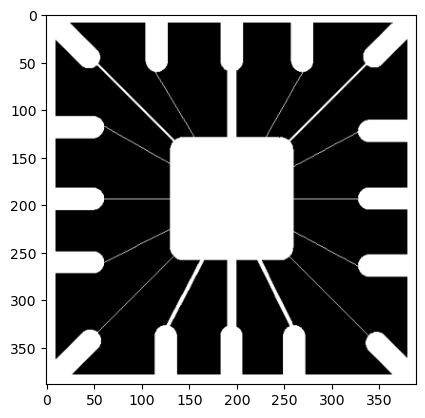

In [251]:
img = cv.imread("D:\DIP Book\output.png",0)
filter = np.array([[0,1,0] , [1,1,1] , [0,1,0]])
img = img/255
plt.imshow(img, 'gray')
center = 3//2

### Structure Element 3x3

In [255]:
erosion = np.zeros_like(img)
pad_erosion = np.pad(img , 1)
for i in range(1,pad_erosion.shape[0]-1):
    for j in range(1,pad_erosion.shape[1]-1):
        edge  =  pad_erosion[i:i+3  , j:j+3]
        if filter[center , center] == edge[center , center]:
            if filter[center+1 , center] == edge[center+1  , center]:
                if filter[center , center+1] == edge[center , center+1]:
                    if filter[center-1 , center] == edge[center-1 , center]:
                        if filter[center , center-1] == edge[center , center-1]:
                            erosion[i,j] = 1
                        else:
                            erosion[i,j] = 0


    


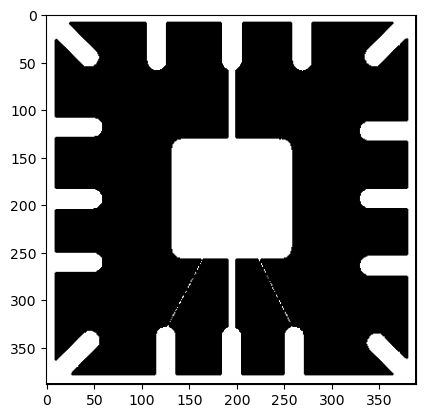

In [256]:
plt.imshow(erosion, 'gray')                            


## Structure Element 11x11

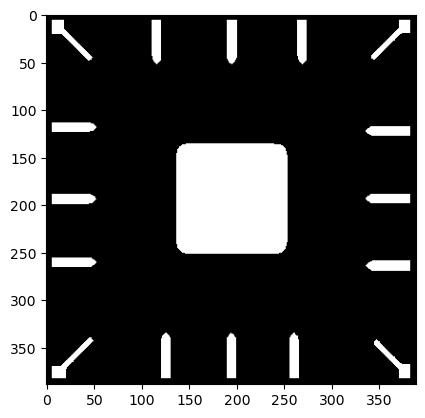

In [259]:
filter_11 = np.ones((11,11) , dtype = bool)
erosion_img = np.zeros_like(erosion)
pad_img = np.pad(erosion , 5)
for i in range(5,pad_img.shape[0]-5):
    for j in range(5,pad_img.shape[1]-5):
        edge=pad_img[i-5:i+6 ,j-5:j+6 ]
        if filter_11.all() == edge.all():
            erosion_img[i-5,j-5] = 1
        else:
            erosion_img[i-5,j-5] = 0

plt.imshow(erosion_img,'gray')


## Structure Element 15x15

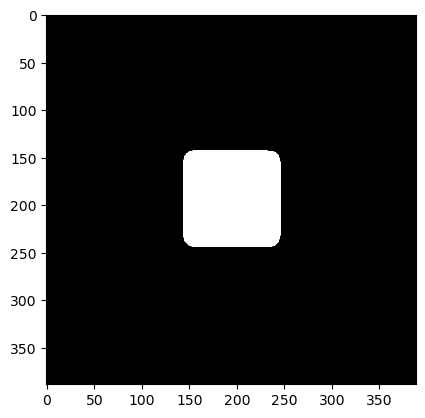

In [377]:
filter_15 = np.ones((15,15),dtype =bool)
erosion_img2 = np.zeros_like(erosion_img)
pad_img = np.pad(erosion_img, 7)
for i in range(erosion_img2.shape[0]):
    for j in range(erosion_img2.shape[1]):
        edge = pad_img[i:i+15 , j:j+15]
        
        if filter_15.all() == edge.all():
             erosion_img2[i,j] = 1
        else:
             erosion_img2[i,j] = 0

plt.imshow(erosion_img2, cmap ='gray')


## Structure Element 45x45

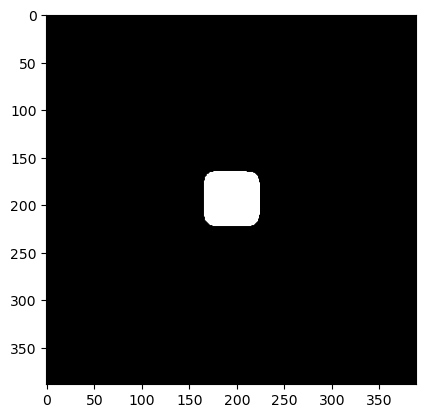

In [381]:
filter_45 = np.ones((45,45),dtype =bool)
erosion_img3 = np.zeros_like(erosion_img2)
pad_img = np.pad(erosion_img2, 22)
for i in range(22,pad_img.shape[0]-22):
    for j in range(22,erosion_img3.shape[1]-22):
        edge = pad_img[i-22:i+23 , j-22:j+23]
        
        if filter_45.all() == edge.all():
             erosion_img3[i-22,j-22] = 1
        else:
             erosion_img3[i-22,j-22] = 0

plt.imshow(erosion_img3, cmap ='gray')


In [291]:
erosion_img2.shape

(389, 389)

# Erosion

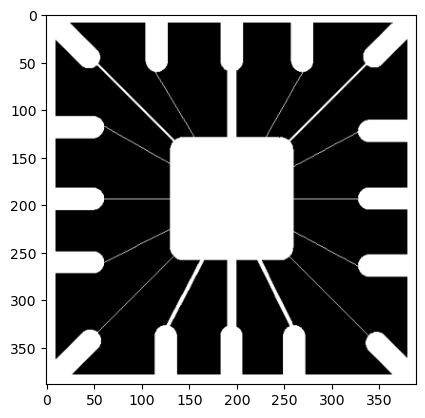

In [351]:
img = cv.imread("D:\DIP Book\output.png",0)
filter = np.array([[0,1,0] , [1,1,1] , [0,1,0]])

img = img/255
plt.imshow(img, 'gray')
center = 3//2

## 3x3 Element Structure

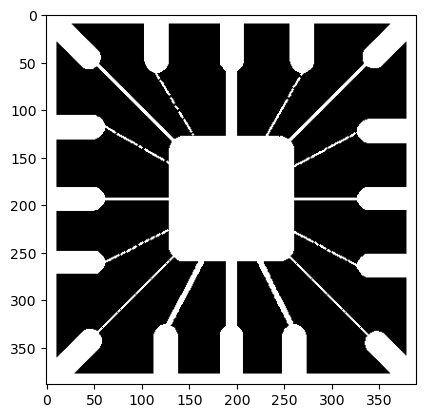

In [361]:
threshold = 0.5
binary_img = img > threshold
dilation = np.zeros_like(binary_img,dtype = bool )
pad_dilation = np.pad(binary_img , 1)
for i in range(1,pad_dilation.shape[0]-1):
    for j in range(1,pad_dilation.shape[1]-1):
        edge  =  pad_dilation[i-1:i+2  , j-1:j+2]
        if np.any(filter & edge):
             dilation[i-1,j-1] = 1
        else:
            pass

plt.imshow(dilation,'gray')

## 15x15 Element Structure

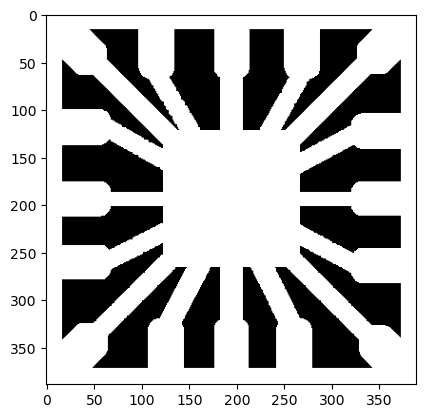

In [403]:
filter_15 = np.ones((15,15),dtype =bool)
threshold = 0.5
binary_img = img > threshold
dilation = np.zeros_like(binary_img,dtype = bool )
pad_dilation = np.pad(binary_img , 7)
for i in range(7,pad_dilation.shape[0]-7):
    for j in range(7,pad_dilation.shape[1]-7):
        edge  =  pad_dilation[i-7:i+8  , j-7:j+8]
        if np.any(filter_15 & edge):
             dilation[i-7,j-7] = 1
        else:
            pass

plt.imshow(dilation,'gray')

## 17x17 Element Structure

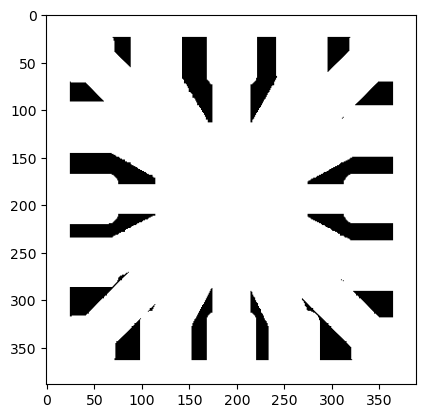

In [405]:
filter_45 = np.ones((17,17) , dtype = bool)
dilate_img = np.zeros_like(dilation , dtype = bool)
pad_img = np.pad(dilation , 8)
for i in range(8, pad_img.shape[0] -8):
    for j in range(8, pad_img.shape[1]-8):
        edge = pad_img[i-8 : i+9 , j-8: j+9]
        if np.any(filter_45 & edge):
            dilate_img[i-8 , j-8] = 1

plt.imshow(dilate_img,'gray')
        

Object 1: Area = 4, Centroid = (194.0, 194.0)


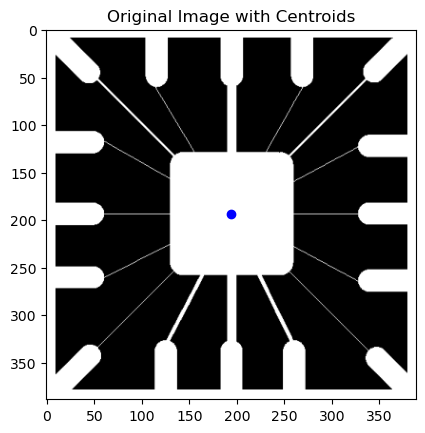

In [417]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('D:/DIP Book/output.png', cv.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, binary_img = cv.threshold(img, 128, 255, cv.THRESH_BINARY)

# Find contours of the objects
contours, _ = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Initialize lists to store areas and centroids
areas = []
centroids = []

# Iterate through each contour to calculate area and centroid manually
for contour in contours:
    # Initialize variables to calculate area and centroid coordinates
    area = 0
    sum_x = 0
    sum_y = 0
    
    # Iterate through each point in the contour
    for point in contour:
        x, y = point[0]
        area += 1
        sum_x += x
        sum_y += y

    # Calculate the centroid coordinates manually
    if area > 0:
        cX = sum_x / area
        cY = sum_y / area
    else:
        cX, cY = 0, 0

    # Append the calculated area and centroid
    areas.append(area)
    centroids.append((cX, cY))

# Display areas and centroids
for i, (area, centroid) in enumerate(zip(areas, centroids)):
    print(f"Object {i+1}: Area = {area}, Centroid = {centroid}")

# Plot original image with centroids marked
plt.imshow(img, cmap='gray')
plt.title('Original Image with Centroids')
for centroid in centroids:
    plt.plot(centroid[0], centroid[1], 'bo')
plt.show()
